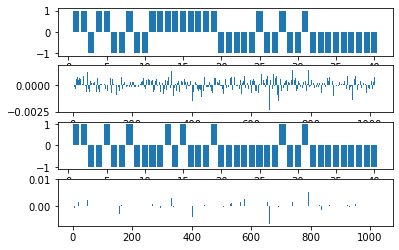

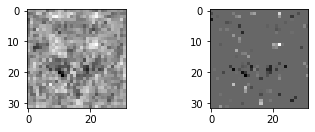

In [48]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

data_cat = sio.loadmat('catData_w.mat')
data_dog = sio.loadmat('dogData_w.mat')

cat_wave = data_cat['cat_wave']
dog_wave = data_dog['dog_wave']

CD = np.concatenate((dog_wave, cat_wave), axis=1)

train = np.concatenate((dog_wave[:, :60], cat_wave[:, :60]), axis=1)
test = np.concatenate((dog_wave[:, 60:80], cat_wave[:, 60:80]), axis=1)

label = np.concatenate((np.ones((60, 1)), -np.ones((60, 1))), axis=0).T

A = label @ np.linalg.pinv(train)
test_labels = np.sign(A @ test)

plt.subplot(4, 1, 1)
plt.bar(range(1,41),test_labels[0, :])

plt.subplot(4, 1, 2)
plt.bar(range(1,1025),A[0, :])

plt.figure(2)
plt.subplot(2, 2, 1)
img_rotated = np.rot90(A.reshape(32, 32), k=-1)
plt.imshow(img_rotated, cmap='gray')



plt.figure(1)
plt.subplot(4, 1, 3)
lasso = Lasso(alpha=0.1)
lasso.fit(np.transpose(train), np.transpose(label))
A = np.transpose(lasso.coef_)
#A = np.transpose(lasso(np.transpose(train), np.transpose(train), alpha=0.1))
test_labels = np.sign(A @ test)
plt.bar(range(1,41),test_labels)

plt.subplot(4, 1, 4)
plt.bar(range(1,1025),A)

plt.figure(2)
plt.subplot(2, 2, 2)
img_rotated = np.rot90(A.reshape(32, 32), k=-1)
plt.imshow(img_rotated, cmap='gray')



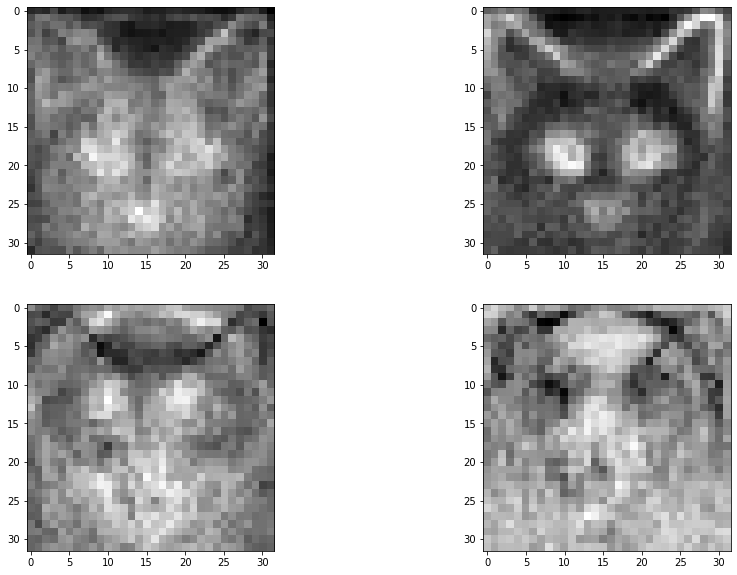

In [44]:
CD = np.concatenate((dog_wave, cat_wave), axis=1)

# perform SVD on the centered data matrix
CD_centered = CD - np.mean(CD)
U, S, V = np.linalg.svd(CD_centered, full_matrices=False)

fig = plt.figure(figsize=(15, 10))
for i in range(4):
    ax = fig.add_subplot(2, 2, i+1)
    img_rotated = np.rot90(U[:,i].reshape(32, 32), k=-1)
    plt.imshow(img_rotated, cmap='gray')



